In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv(r"C:\Users\ashum\Downloads\archive (2)\movies2.csv")
df = df.sort_values(by=['vote_average'], ascending=False)
df

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count
0,0,667257,Impossible Things,2021-06-17,A widow who is tormented by the memory of her ...,63.055,9.1,204
2465,2465,667257,Impossible Things,2021-06-17,A widow who is tormented by the memory of her ...,63.055,9.1,204
2,2,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.315,8.7,3568
1,1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,93.977,8.7,21193
2468,2468,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",98.111,8.7,15817
...,...,...,...,...,...,...,...,...
2461,2461,26914,Troll 2,1990-10-12,When young Joshua learns that he will be going...,10.199,3.9,311
2463,2463,94365,The Human Centipede 3 (Final Sequence),2015-05-22,Taking inspiration from The Human Centipede fi...,31.195,3.7,570
2464,2464,7916,Far Cry,2008-10-02,"Jack Carver, a former member of the Special Fo...",11.332,3.7,216
4928,4928,94365,The Human Centipede 3 (Final Sequence),2015-05-22,Taking inspiration from The Human Centipede fi...,31.195,3.7,570


There seems to be some replicate rows.

In [3]:
df = df.drop_duplicates(subset=['title', 'release_date', 'overview', 'popularity', 'vote_average', 'vote_count'], keep='last')

# Top 25 of popular film

C:\Users\ashum\AppData\Local\Temp\ipykernel_13796\3279013651.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


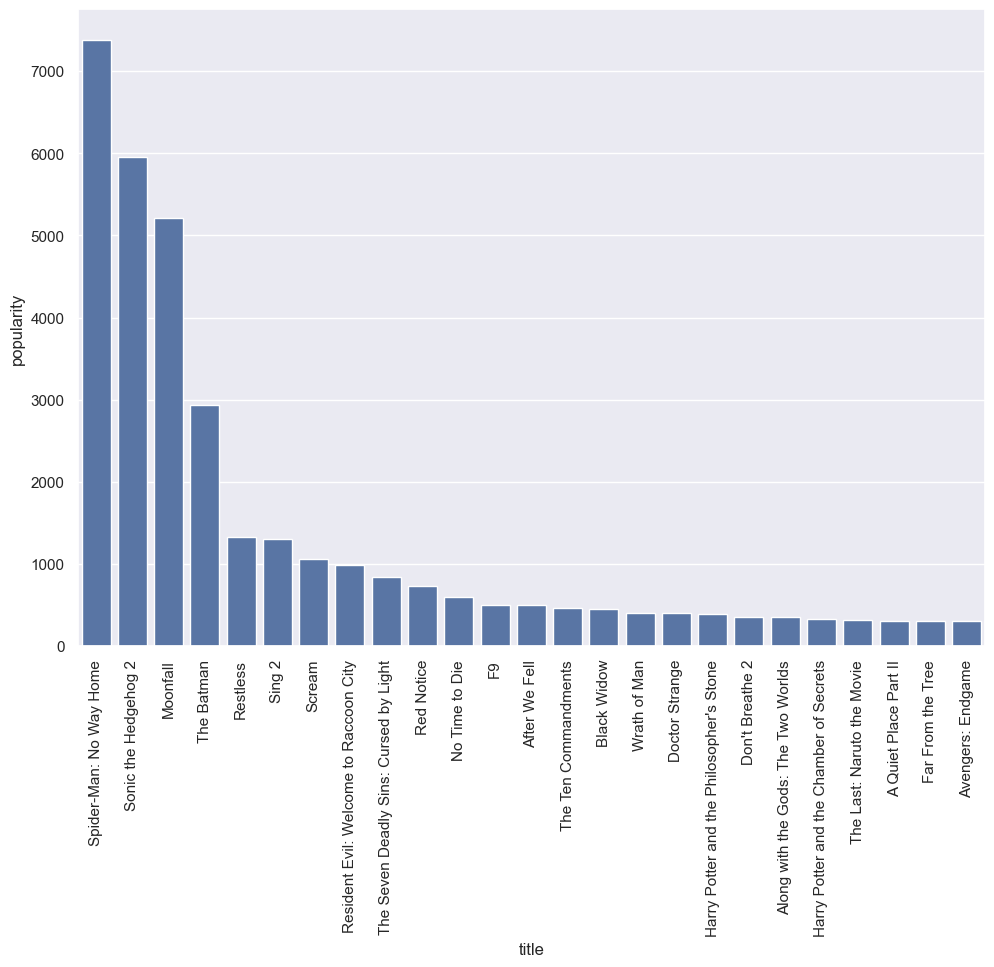

In [4]:
df = df.sort_values(by=['popularity'], ascending=False)
chart = sns.barplot(x="title", y="popularity", data=df.head(25))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

# Top 25 average vote

C:\Users\ashum\AppData\Local\Temp\ipykernel_13796\2962207425.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


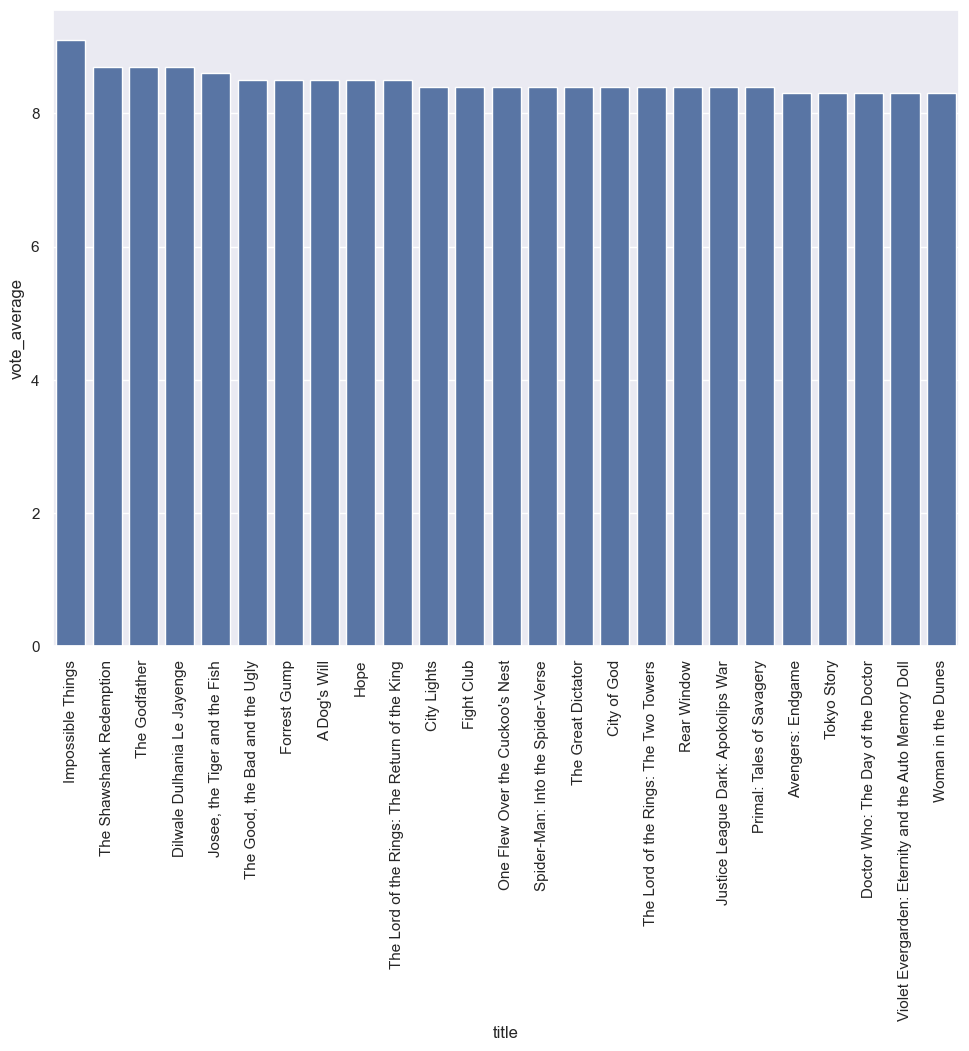

In [5]:
df = df.sort_values(by=['vote_average'], ascending=False)
chart = sns.barplot(x="title", y="vote_average", data=df.head(25))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

# Let's see all the movies sorted by the average vote

In [6]:
#df = df.sort_values(by=['popularity'], ascending=False)
fig = px.bar(df, x='title', y='vote_average', color="popularity")
fig.show()

# Good visualization of the movies and their popularity

In [7]:
fig = px.scatter(df, x="title", y="vote_average", size="popularity", color="vote_average", 
                 hover_name="title",
                 #log_x=True,
                 size_max=60)
fig.show()

In [8]:
#df = df.sort_values(by=['title'], ascending=False)
fig = px.scatter(df, x="title", y="popularity", size="popularity", color="vote_average", 
                 hover_name="title",
                 #log_x=True,
                 #size_max=60
                )
fig.show()

# Additional charts

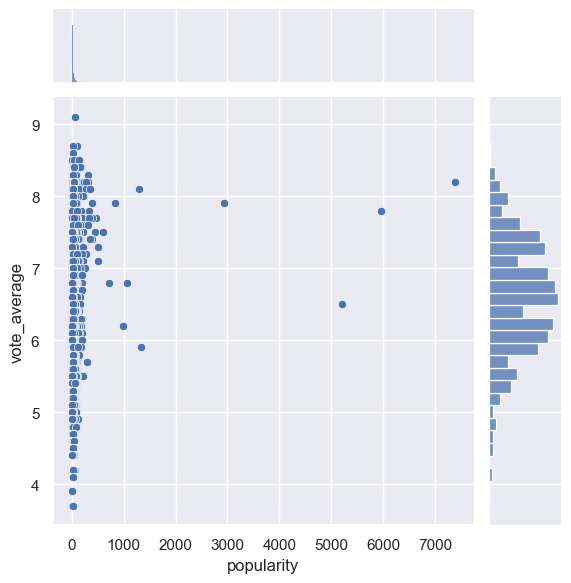

In [9]:
g = sns.jointplot(
    data=df,
    x="popularity", y="vote_average",
)

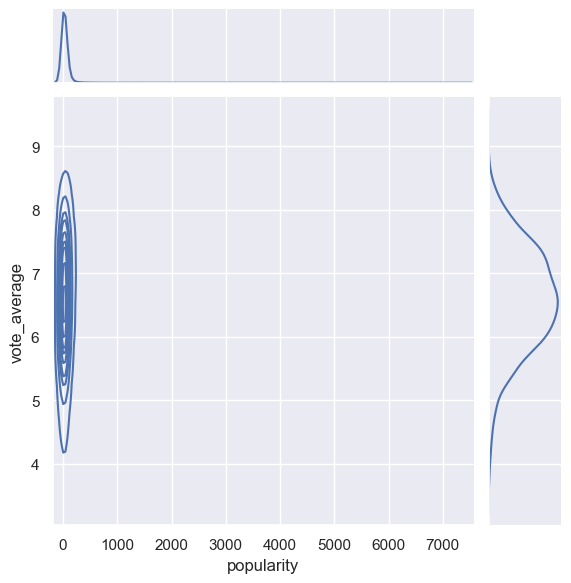

In [10]:
g = sns.jointplot(
    data=df,
    x="popularity", y="vote_average",
    kind="kde",
)